In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/3927582654.py:23: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/3927582654.py:23: DtypeWarning: Columns (15,46,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/3927582654.py:23: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/3927582654.py:23: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


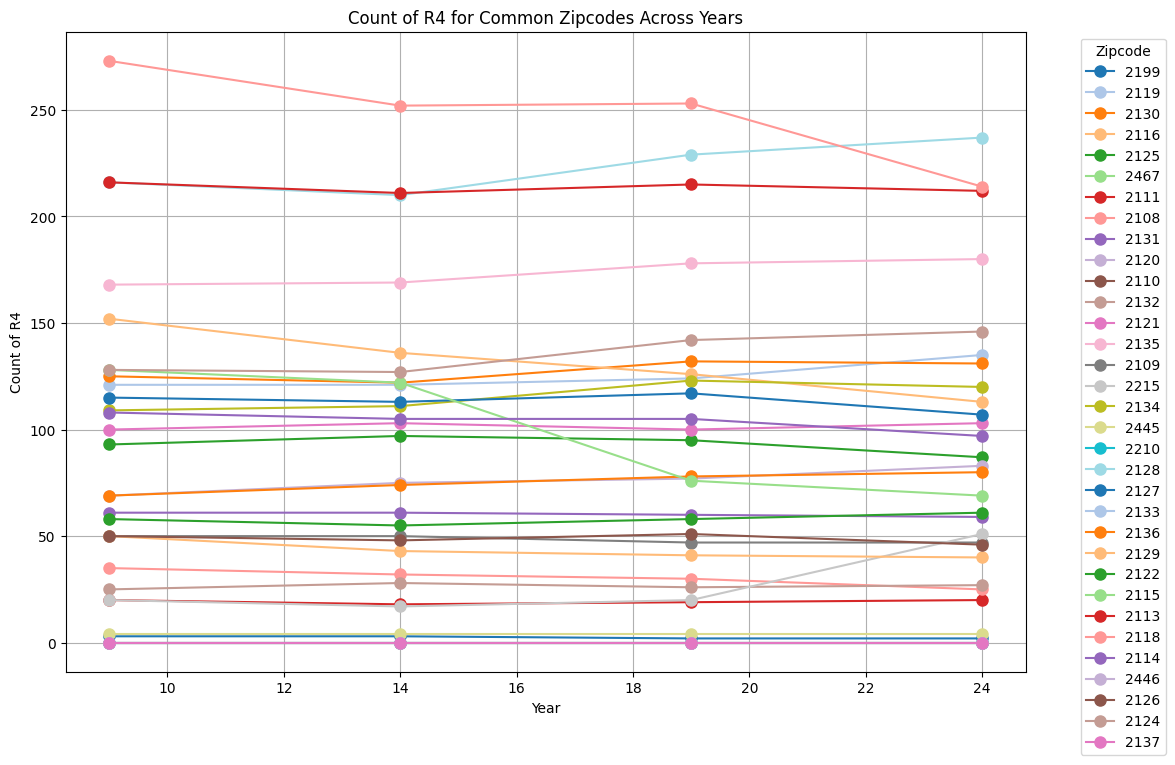

In [61]:
# Function to normalize zip codes
def normalize_zip(zipcode):
    # Check if the value is NaN
    if pd.isna(zipcode):
        return None
    
    # Convert to string
    zipcode = str(zipcode)
    
    # Remove decimal part if present
    if '.' in zipcode:
        zipcode = zipcode.split('.')[0]
    
    # Check if the zip code has a leading zero and underscore at the end
    if len(zipcode) > 1 and zipcode[0] == '0' and zipcode[-1] == '_':
        return zipcode[1:-1]  # Remove the leading zero and underscore
    else:
        return zipcode
    
# Function to process each file
def process_file(filename):
    # Read data from file
    data = pd.read_csv(filename)

    data['ZIPCODE'] = data['ZIPCODE'].apply(normalize_zip)
    
    # Extract unique zip codes
    unique_zipcodes = data['ZIPCODE'].unique()
    
    # Store counts for each zipcode for current file
    zipcode_counts = {}
    
    # Iterate over unique zip codes
    for zipcode in unique_zipcodes:
        # Filter rows where 'LU' is 'R4' and count them
        count = data[(data['ZIPCODE'] == zipcode) & (data['LU'] == 'R4')].shape[0]
        zipcode_counts[zipcode] = count
    
    return zipcode_counts

# Initialize data structure to hold counts for each year
all_zipcode_counts = {}

# Process files for years 9, 14, 19, and 24
for year in [9, 14, 19, 24]:
    filename = f'FY{year:d}.csv'
    counts = process_file(os.path.join(filename))
    all_zipcode_counts[year] = counts

# Extract unique zip codes for years 9, 14, 19, and 24
unique_zipcodes_9 = set(all_zipcode_counts[9].keys())
unique_zipcodes_14 = set(all_zipcode_counts[14].keys())
unique_zipcodes_19 = set(all_zipcode_counts[19].keys())
unique_zipcodes_24 = set(all_zipcode_counts[24].keys())

# Find common zip codes among all years
common_zipcodes = unique_zipcodes_9.intersection(unique_zipcodes_14, unique_zipcodes_19, unique_zipcodes_24)

# Plotting for common zip codes
plt.figure(figsize=(12, 8))  # Increase the figure size

# Use a colormap with enough distinct colors
colors = plt.cm.tab20.colors

# Cycle through different colors for each line
color_index = 0

for zipcode in common_zipcodes:
    counts_9 = all_zipcode_counts[9].get(zipcode, 0)  # Handle missing zipcodes in certain years
    counts_14 = all_zipcode_counts[14].get(zipcode, 0)
    counts_19 = all_zipcode_counts[19].get(zipcode, 0)
    counts_24 = all_zipcode_counts[24].get(zipcode, 0)
    plt.plot([9, 14, 19, 24], [counts_9, counts_14, counts_19, counts_24], marker='o', label=zipcode, markersize=8, color=colors[color_index])  # Specify color
    color_index = (color_index + 1) % len(colors)  # Cycle through colors

plt.xlabel('Year')
plt.ylabel('Count of R4')
plt.title('Count of R4 for Common Zipcodes Across Years')
plt.legend(title='Zipcode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Adjust margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()




/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/3882858697.py:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filename))
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/3882858697.py:9: DtypeWarning: Columns (15,46,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filename))
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/3882858697.py:9: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filename))
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/3882858697.py:9: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filename))


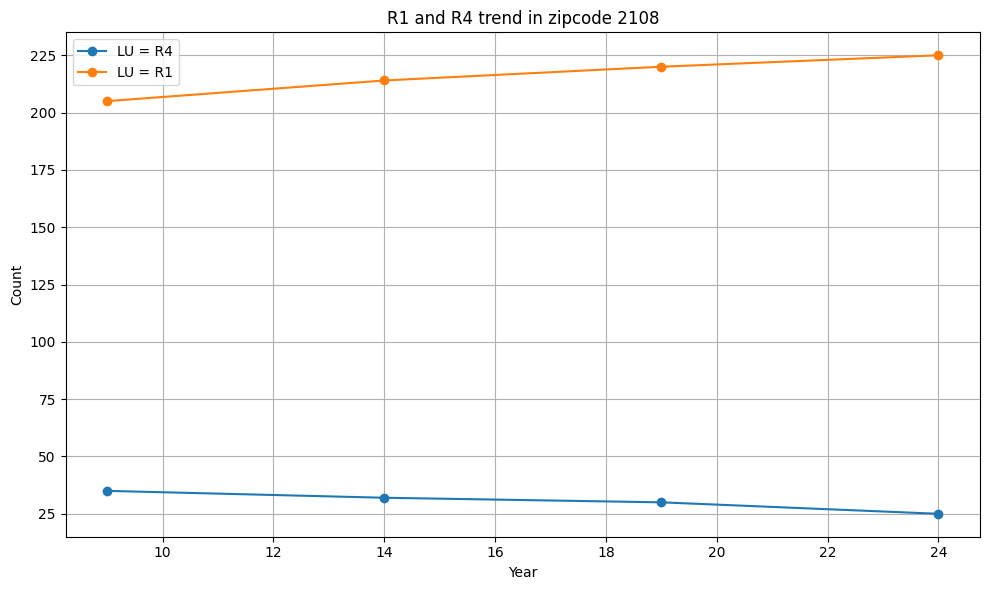

In [62]:
# Initialize lists to store counts for LU=R4 and LU=R1
counts_r4 = []
counts_r1 = []


# Iterate over the years and get counts for LU=R4 and LU=R1 for the specified zipcode
for year in [9, 14, 19, 24]:
    filename = f'FY{year:d}.csv'
    data = pd.read_csv(os.path.join(filename))
    data['ZIPCODE'] = data['ZIPCODE'].apply(normalize_zip)
    
    count_r4 = data[(data['ZIPCODE'] == '2108') & (data['LU'] == 'R4')].shape[0]
    count_r1 = data[(data['ZIPCODE'] == '2108') & (data['LU'] == 'R1')].shape[0]
    
    counts_r4.append(count_r4)
    counts_r1.append(count_r1)

# Plotting
plt.figure(figsize=(10, 6))

# Plot counts for LU=R4
plt.plot([9, 14, 19, 24], counts_r4, label='LU = R4', marker='o')

# Plot counts for LU=R1
plt.plot([9, 14, 19, 24], counts_r1, label='LU = R1', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('R1 and R4 trend in zipcode 2108')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/3726910103.py:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filename))
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/3726910103.py:9: DtypeWarning: Columns (15,46,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filename))
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/3726910103.py:9: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filename))
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/3726910103.py:9: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filename))


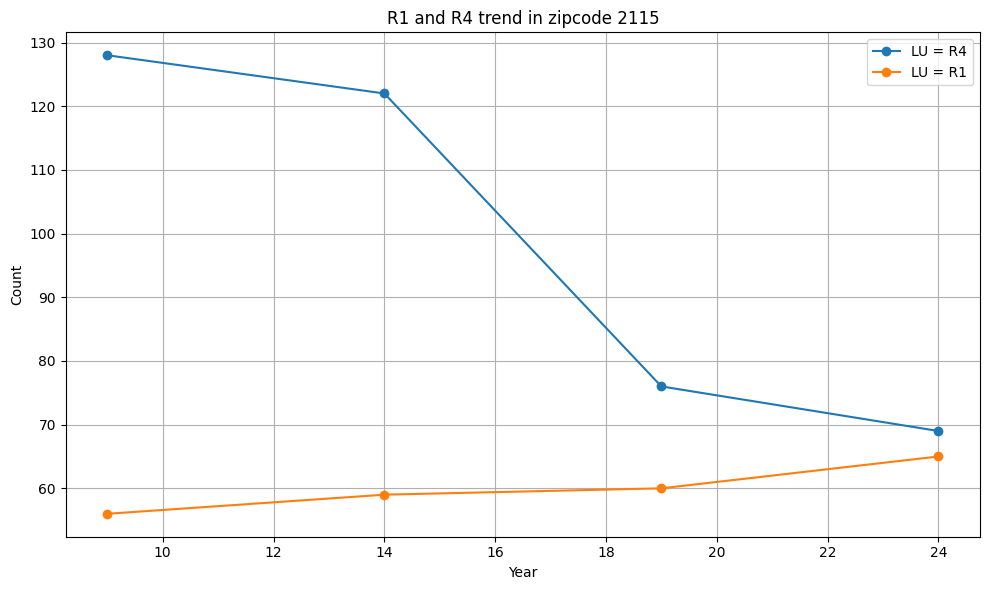

In [63]:
# Initialize lists to store counts for LU=R4 and LU=R1
counts_r4 = []
counts_r1 = []


# Iterate over the years and get counts for LU=R4 and LU=R1 for the specified zipcode
for year in [9, 14, 19, 24]:
    filename = f'FY{year:d}.csv'
    data = pd.read_csv(os.path.join(filename))
    data['ZIPCODE'] = data['ZIPCODE'].apply(normalize_zip)
    
    count_r4 = data[(data['ZIPCODE'] == '2115') & (data['LU'] == 'R4')].shape[0]
    count_r1 = data[(data['ZIPCODE'] == '2115') & (data['LU'] == 'R1')].shape[0]
    
    counts_r4.append(count_r4)
    counts_r1.append(count_r1)

# Plotting
plt.figure(figsize=(10, 6))

# Plot counts for LU=R4
plt.plot([9, 14, 19, 24], counts_r4, label='LU = R4', marker='o')

# Plot counts for LU=R1
plt.plot([9, 14, 19, 24], counts_r1, label='LU = R1', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('R1 and R4 trend in zipcode 2115')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/832434552.py:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filename))
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/832434552.py:9: DtypeWarning: Columns (15,46,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filename))
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/832434552.py:9: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filename))
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_50203/832434552.py:9: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filename))


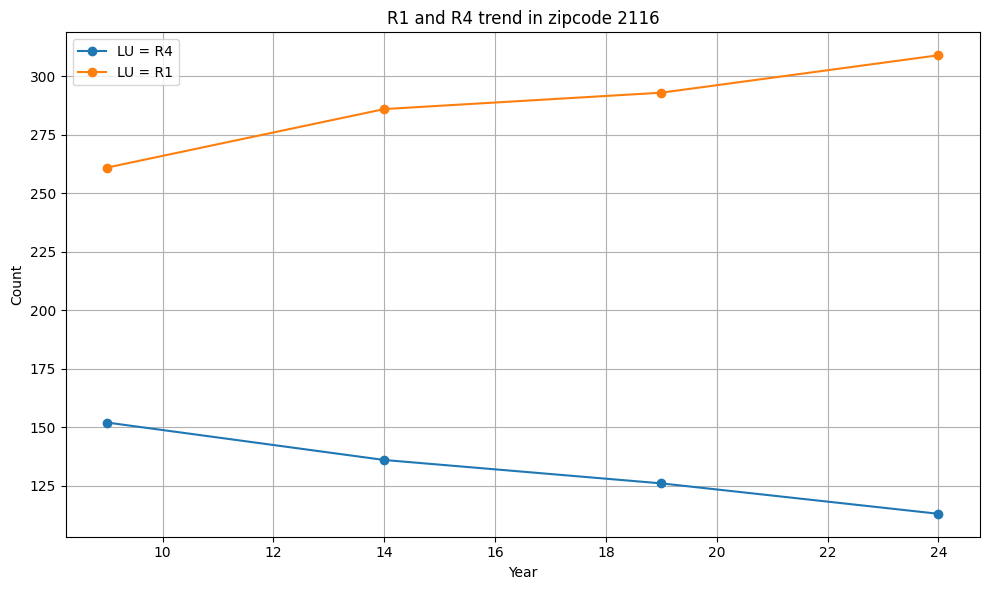

In [67]:
# Initialize lists to store counts for LU=R4 and LU=R1
counts_r4 = []
counts_r1 = []


# Iterate over the years and get counts for LU=R4 and LU=R1 for the specified zipcode
for year in [9, 14, 19, 24]:
    filename = f'FY{year:d}.csv'
    data = pd.read_csv(os.path.join(filename))
    data['ZIPCODE'] = data['ZIPCODE'].apply(normalize_zip)
    
    count_r4 = data[(data['ZIPCODE'] == '2116') & (data['LU'] == 'R4')].shape[0]
    count_r1 = data[(data['ZIPCODE'] == '2116') & (data['LU'] == 'R1')].shape[0]
    
    counts_r4.append(count_r4)
    counts_r1.append(count_r1)

# Plotting
plt.figure(figsize=(10, 6))

# Plot counts for LU=R4
plt.plot([9, 14, 19, 24], counts_r4, label='LU = R4', marker='o')

# Plot counts for LU=R1
plt.plot([9, 14, 19, 24], counts_r1, label='LU = R1', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('R1 and R4 trend in zipcode 2116')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
